<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Visualización y limpieza con Pandas

Visualización de los datos del dataset futbol\
v1.1

### **Objetivos: Asociados al preprocesamiento y visualización de los datos.**


*   Implemetar el código de descarga de un archivo csv.
*   Comprender la lectura de un archivo csv con Pandas.
*   Realizar la descripción estadística con Pandas.
*   Identificar y eliminar datos faltantes.
*   Explorar los datos y aplicar filtros.
*   Representar graficamente los datos para comparar los resultados de los partidos.

In [1]:
# Módulo os (sistema operativo)
import os
# Módulo platform, acceso a los datos identificativos de la plataforma subyacente.
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

## Código de descarga del archivo csv.

In [2]:
# Código que permite acceder al archivo partidos.csv, en caso no tenga acceso al archivo,
# El condicional propone identificar la plataforma, si es Windows va a buscar el archivo en github de Inove y lo descargará.
# En caso sea una plataforma diferente va a buscar el archivo en la ruta especificada.

if os.access('partidos.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/partidos.csv > partidos.csv
    else:
        !wget partidos.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/partidos.csv

--2023-01-25 01:09:55--  http://partidos.csv/
Resolving partidos.csv (partidos.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘partidos.csv’
--2023-01-25 01:09:55--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/partidos.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3143988 (3.0M) [text/plain]
Saving to: ‘partidos.csv’

partidos.csv        100%[===================>]   3.00M  --.-KB/s    in 0.05s   

2023-01-25 01:09:56 (66.1 MB/s) - ‘partidos.csv’ saved [3143988/3143988]

FINISHED --2023-01-25 01:09:56--
Total wall clock time: 0.4s
Downloaded: 1 files, 3.0M in 0.05s (66.1 MB/s)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

## Lectura de un archivo csv con Pandas.

In [20]:
# Una vez descargado el archivo en Colab.
# Leerlo con Pandas y el método read_csv
# Una vez extraida toda la información se almacena en df
# A partir de df y el método describe(), mostrará la descripción estadistica básica del archivo que se guardará en des
df = pd.read_csv("partidos.csv")
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41581,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True
41582,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True
41583,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True
41584,2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True


## Descripción estadística con Pandas.

In [19]:
des = df.describe()
des

,home_score,away_score
count,41586.000000,41586.000000
mean,1.745756,1.187587
std,1.753780,1.405323
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


## Identificar y eliminar datos faltantes.

In [5]:
# Crear una fila nueva llamada Nan en el DataFrame  des,
# que indica la cantidad de datos tipo Nan que tiene cada columna.
# Para crear una nueva fila, se utilizará el operador loc, donde se indica el nombre
# de la nueva fila y con que valores se completará.
# La información será de los datos faltantes df.isna().sum()
des.loc['Nan'] = df.isna().sum()

In [6]:
# Crear una fila nueva llamada %Nan en el DataFrame des,
# Esta fila se completará con los porcentajes de Nan encontrados en cada columna.
des.loc['%Nan'] = (df.isna().mean())*100
des

,home_score,away_score
count,41586.000000,41586.000000
mean,1.745756,1.187587
std,1.753780,1.405323
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000
Nan,0.000000,0.000000
%Nan,0.000000,0.000000


In [7]:
# Muestra las 5 primeras filas del DataFrame df
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [28]:
# Haciendo copia de df
df1 = df.copy()

In [29]:
# Cambiar los nombres de las columnas.
# Para ello, del DataFrame df accedemos a columns que contiene todos los nombres de las columnas.
# Las cuales se van a sobreescribir con los nuevos nombres.
df1.columns = ['fecha', 'equipo_local', 'equipo_visitante', 'resultado_local', 'resultado_visitante', 'torneo', 'ciudad', 'pais', 'neutral']
df1.head()

,fecha,equipo_local,equipo_visitante,resultado_local,resultado_visitante,torneo,ciudad,pais,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [33]:
# ¿Cuántos datos quedaron para analizar?
# Con shape muestra las filas y columnas disponibles en df_clean
df1.shape

(41586, 9)

## Fin de la limpieza
No hay datos incompletos o mal ingresados en el dataset, está limpio! No es necesario ningún tipo de limpieza

In [34]:
print('Cantidad de datos en observacion:', df1.shape[0])

Cantidad de datos en observacion: 41586


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [35]:
# Muestra las 5 primeras filas del DataFrame df
df1.head()

,fecha,equipo_local,equipo_visitante,resultado_local,resultado_visitante,torneo,ciudad,pais,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


*  Se puede observar que está el puntaje de cada partido, pero no el resultado final (wins, loses, draws) --> (ganó, perdió, empató).
*   Agregaremos una columna "results" con el resultado por partido.

## Explorar los datos y aplicar filtros


In [36]:
# Sa filtra el dataset para agregar una nueva columna llamada "resultados".
# Esta columna permite incrementar la información a partir de la ya disponible.
# Para ello, la columna resultados se completará con el retorno de una lambda.
# La lambda va a recorrer todo el DataFrame para verificar los condicionales establecidos:
# 'ganó' if x.resultado_local > x.resultado_visitante
#'perdió' if x.resultado_local < x.resultado_visitante
# else 'empató'
# El axis=1, es para que se aplica la lambda para cada fila del DataFrame.
df1['resultados'] = df1.apply(lambda x : 'ganó' if x.resultado_local > x.resultado_visitante else 'perdió' if x.resultado_local < x.resultado_visitante else 'empató', axis=1)
df1.head()

,fecha,equipo_local,equipo_visitante,resultado_local,resultado_visitante,torneo,ciudad,pais,neutral,resultados
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,empató
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,ganó
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,ganó
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,empató
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,ganó


In [38]:
# En el registro de la totalidad de partidos, 
# ¿Cuántos partidos se ganaron, cuántos se pierden y cuántos se empataron?
# Para ello, se implementa el método value_counts() que se encarga de 
# contabilizar la frecuencia de los registros categoricos.
df1['resultados'].value_counts()

ganó      20234
perdió    11774
empató     9578
Name: resultados, dtype: int64

In [40]:
# En la columna equipo_local, se cuenta cuántos valores únicos se encuentran.
print("¿Cuántos países hay registrados?:", df1['equipo_local'].nunique())

¿Cuántos países hay registrados?: 308


## Representar graficamente los datos para comparar los resultados de los partidos.

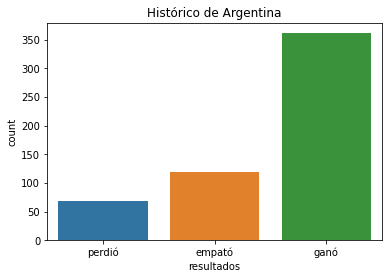

In [42]:
# Partidos jugados por Argentina de local:
pais_analizar = 'Argentina'

# Se filtra df1 para extraer la información del equipo Argentino.
df_arg = df1[ df1['equipo_local'] == pais_analizar]

# countplot, similar a un grágico de barrar, permite comparar la frecuencia de los datos a estudiar,
# en este caso, la freciencia de los resultados de los partidos.
# sns, alias de Seaborn
# x='resultados', nombre de la columna que se desea observar la frecuencia
# data=df_arg, el DataFrame von la información.
# set_title(f"Histórico de {pais_analizar} permite asociar un título al gráfico
# plt.show() muestra el gráfico.
sns.countplot(x='resultados', data=df_arg).set_title(f"Histórico de {pais_analizar}")
plt.show()

# El countplot nos resuelve no tener que hacer lo siguiente:
#sns.barplot(x=df_arg['result'].value_counts().index, y=df_arg['result'].value_counts())
